Importing libraries

In [1]:
#data handling
import pandas as pd
import numpy as np
import os 
from PIL import Image

# Machine learning (non deep learning)
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

# Deep learning
import tensorflow as tf
import keras
from keras import layers
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


# plotting
import seaborn as sns
import matplotlib.pyplot as plt

#misc
import time

Read in csv data from file

In [2]:
tumor_labels = pd.read_csv("dataset/label.csv")

In [3]:
tumor_labels

,file_name,label
0,IMAGE_0000.jpg,meningioma_tumor
1,IMAGE_0001.jpg,no_tumor
2,IMAGE_0002.jpg,meningioma_tumor
3,IMAGE_0003.jpg,glioma_tumor
4,IMAGE_0004.jpg,meningioma_tumor
...,...,...
2995,IMAGE_2995.jpg,no_tumor
2996,IMAGE_2996.jpg,meningioma_tumor
2997,IMAGE_2997.jpg,glioma_tumor
2998,IMAGE_2998.jpg,glioma_tumor


In [4]:
for i in range(len(tumor_labels)):
    if (tumor_labels.iloc[i]["label"] == "no_tumor"):
        tumor_labels.iloc[i]["label"] = "no tumor"
    else: 
        tumor_labels.iloc[i]["label"] = "tumor"

In [5]:
tumor_labels

,file_name,label
0,IMAGE_0000.jpg,tumor
1,IMAGE_0001.jpg,no tumor
2,IMAGE_0002.jpg,tumor
3,IMAGE_0003.jpg,tumor
4,IMAGE_0004.jpg,tumor
...,...,...
2995,IMAGE_2995.jpg,no tumor
2996,IMAGE_2996.jpg,tumor
2997,IMAGE_2997.jpg,tumor
2998,IMAGE_2998.jpg,tumor


In [6]:
img_reshape_size = (32,32)

data = []
result = []

encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# path to tumor files
tumor_image_dir = "dataset/split_data/binary/tumor"
tumor_files = os.listdir(tumor_image_dir)

# path to non tumor files
no_tumor_image_dir = "dataset/split_data/binary/no_tumor"
no_tumor_files = os.listdir(no_tumor_image_dir)

for file in tumor_files:
    temp_file_path = "dataset/split_data/binary/tumor/"+file
    #print("path is " +temp_file_path)
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    data.append(np.array(img))
    result.append(encoder.transform([[1]]).toarray())
        

for file in no_tumor_files:
    temp_file_path = "dataset/split_data/binary/no_tumor/"+file
    #print("path is " +temp_file_path)
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    data.append(np.array(img))
    result.append(encoder.transform([[0]]).toarray())

In [7]:
data = np.array(data)
print(data.shape)

result = np.array(result)
result = result.reshape(3000,2)

x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

(3000, 32, 32)


In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(32, 32, 1), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax',  metrics = ['accuracy'])
#print(model.summary())

In [9]:
start_time = time.time()
history = model.fit(x_train, y_train, epochs = 60, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/60
60/60 [==============================] - 4s 51ms/step - loss: 0.9430 - accuracy: 0.8292 - val_loss: 0.2522 - val_accuracy: 0.9183
Epoch 2/60
60/60 [==============================] - 3s 48ms/step - loss: 0.4258 - accuracy: 0.8788 - val_loss: 0.6994 - val_accuracy: 0.7167
Epoch 3/60
60/60 [==============================] - 3s 49ms/step - loss: 0.3149 - accuracy: 0.8888 - val_loss: 0.2862 - val_accuracy: 0.9050
Epoch 4/60
60/60 [==============================] - 3s 46ms/step - loss: 0.2354 - accuracy: 0.9029 - val_loss: 0.2271 - val_accuracy: 0.9200
Epoch 5/60
60/60 [==============================] - 3s 46ms/step - loss: 0.2068 - accuracy: 0.9179 - val_loss: 0.1967 - val_accuracy: 0.9250
Epoch 6/60
60/60 [==============================] - 3s 51ms/step - loss: 0.1918 - accuracy: 0.9267 - val_loss: 0.1619 - val_accuracy: 0.9250
Epoch 7/60
60/60 [==============================] - 3s 54ms/step - loss: 0.1667 - accuracy: 0.9283 - val_loss: 0.1397 - val_accuracy: 0.9383
Epoch 8/60
60

Epoch 59/60
60/60 [==============================] - 3s 51ms/step - loss: 0.0132 - accuracy: 0.9954 - val_loss: 0.1383 - val_accuracy: 0.9750
Epoch 60/60
60/60 [==============================] - 3s 50ms/step - loss: 0.0064 - accuracy: 0.9987 - val_loss: 0.1225 - val_accuracy: 0.9750
--- 181.19884276390076 seconds ---



30.509965896606445 seconds --- 30 epochs , 0.9683 acc , 16x16 Greyscale image <br>
86.94418954849243 seconds --- 30 epochs , 0.9783 acc , 32x32 Greyscale image <br>
169.6840739250183 seconds --- 60 epochs , 0.9667 acc , 32x32 Greyscale image <br>
335.7380225658417 seconds --- 30 epochs , 0.9700 acc , 64x64 Greyscale image <br>


In [14]:
img_reshape_size = (32,32)

test_data = []
test_result = []

# path to non tumor files
no_tumor_image_dir = "test_dataset/test/split_data/binary/no_tumor"
no_tumor_files = os.listdir(no_tumor_image_dir)

# path to tumor files
tumor_image_dir = "test_dataset/test/split_data/binary/tumor"
tumor_files = os.listdir(tumor_image_dir)

for file in no_tumor_files:
    temp_file_path = "test_dataset/test/split_data/binary/no_tumor/"+file
    #print("path is " +temp_file_path)
    img = Image.open(temp_file_path).convert('L') # not an RGB image so import as greyscale
    img = img.resize(img_reshape_size)
    img = np.array(img)
    test_data.append(np.array(img))
    test_result.append(0)

for file in tumor_files:
    temp_file_path = "test_dataset/test/split_data/binary/tumor/"+file
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    test_data.append(np.array(img))
    test_result.append(1)    

In [21]:
type(test_result)

list

In [24]:
scores = model.evaluate(np.asarray(test_data), np.asarray(test_result), verbose=10)

ValueError: in user code:

    File "c:\users\camer\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1366, in test_function  *
        return step_function(self, iterator)
    File "c:\users\camer\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1356, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\camer\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1349, in run_step  **
        outputs = model.test_step(data)
    File "c:\users\camer\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py", line 1305, in test_step
        self.compiled_loss(
    File "c:\users\camer\appdata\local\programs\python\python39\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\users\camer\appdata\local\programs\python\python39\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\users\camer\appdata\local\programs\python\python39\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\users\camer\appdata\local\programs\python\python39\lib\site-packages\keras\losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\users\camer\appdata\local\programs\python\python39\lib\site-packages\keras\backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 2) are incompatible


In [7]:
tumor_labels['label'] = np.where(tumor_labels['label'] == "no_tumor", "no tumor", tumor_labels['label'])
tumor_labels['label'] = np.where(tumor_labels['label'] != "no tumor", "tumor", tumor_labels['label'])

Text(0.5, 1.0, 'Tumor dataset - probability')

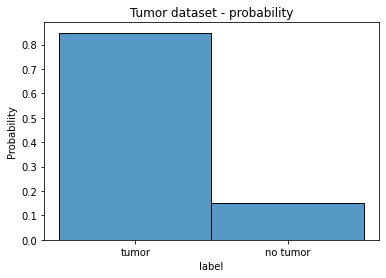

In [10]:
sns.histplot(tumor_labels[tumor_labels.columns[1]], stat="probability").set_title('Tumor dataset - probability')

In [17]:
num_of_classes = 2
input_shape = (512,512,1)
image_dir = "dataset/"
os.listdir(image_dir)

['image', 'label.csv']

In [39]:
train_generator=datagen.flow_from_dataframe(
dataframe=tumor_labels,
directory=image_dir,
shuffle=True,
class_mode="categorical",
target_size=(32,32))

NameError: name 'datagen' is not defined

In [34]:

train_generator=tf.keras.preprocessing.flow_from_dataframe(dataframe=tumor_labels, directory=image_dir, x_col="id", y_col="label", class_mode="categorical", target_size=(32,32), batch_size=32)

AttributeError: module 'keras.api._v2.keras.preprocessing' has no attribute 'flow_from_dataframe'

In [16]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/split_data/binary/",
    labels="inferred",
    batch_size=32
)

Found 3000 files belonging to 2 classes.


In [26]:
vgg16_weight_path = '../input/keras-pretrained-models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = VGG16(
    weights=vgg16_weight_path,
    include_top=False, 
    input_shape=(512,512) + (3,)
)


# basic model for now 
model = keras.Sequential(
    [
        keras.Input(shape=(3000, 512,512)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(2, activation="softmax"),
    ]
)
model.compile()
model.fit()

ValueError: The `weights` argument should be either `None` (random initialization), `imagenet` (pre-training on ImageNet), or the path to the weights file to be loaded.  Received: weights=../input/keras-pretrained-models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

In [68]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        "dataset/",
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        "dataset/",
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

Found 3000 images belonging to 1 classes.
Found 3000 images belonging to 1 classes.
